In [3]:
import pandas
import matplotlib.pyplot as plotlib
import math
plotlib.rcParams['figure.figsize'] = [12, 8]
plotlib.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

def parse_mlp(cell):
    amounts = []
    kinds = []
    if cell == None or cell == "":
        return None,None
    and_parts = cell.split(', ')
    for part in and_parts:
        amount,kind = part.split(' ',1)
        amounts.append(int(amount))
        kinds.append(kind)
        
    if '/' in cell:
        or_parts = cell.split('/')

    return amounts, kinds

challenges = pandas.read_csv('MLP/data/MLP Adventures Card Distribution - Final Challenge.csv')

levels = {
}
for index,row in challenges.iterrows():
    if not row['Level'] in levels:
        levels[row['Level']] = {
            'red': [],
            'green': [],
            'blue': [],
            'any': []
        }
    if not row['Set'] in levels:
        levels[row['Set']] = {
            'red': [],
            'green': [],
            'blue': [],
            'any': []
        }
    amounts,kinds = parse_mlp(row['Per Pony Cost'])
    for ii in range(0,len(amounts)):
        amount = amounts[ii]
        kind = kinds[ii]
        levels[row['Level']]['red'].append(amount if kind == 'Red Cube' else 0)
        levels[row['Level']]['green'].append(amount if kind == 'Green Cube' else 0)
        levels[row['Level']]['blue'].append(amount if kind == 'Blue Cube' else 0)
        levels[row['Level']]['any'].append(amount if kind == 'Cube' else 0)        

data_levels = challenges['Level'].unique().tolist()
reds = []
greens = []
blues = []
anys = []
for level in data_levels:
    reds.append(math.ceil(sum(levels[level]['red'])/len(levels[level]['red'])))
    greens.append(math.ceil(sum(levels[level]['green'])/len(levels[level]['green'])))
    blues.append(math.ceil(sum(levels[level]['blue'])/len(levels[level]['blue'])))
    anys.append(math.ceil(sum(levels[level]['any'])/len(levels[level]['any'])))

bar_width = 0.1

plotlib.figure()
plotlib.title('Final Challenge Cubes per Pony')
plotlib.bar([x - .15 for x in data_levels],reds,label="Red",color='r',width=bar_width)
plotlib.bar([x - .05 for x in data_levels],greens,label="Green",color='g',width=bar_width)
plotlib.bar([x + .05 for x in data_levels],blues,label='Blue',color='b',width=bar_width)
plotlib.bar([x + .15 for x in data_levels],anys,label='Any',color='k',width=bar_width)
plotlib.legend(loc='best')
plotlib.xticks([2, 3, 4])
plotlib.xlabel('Final Challenge Level')
plotlib.ylabel('Color Cubes Required')
plotlib.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/MLP Adventures Card Distribution - Final Challenge.csv'

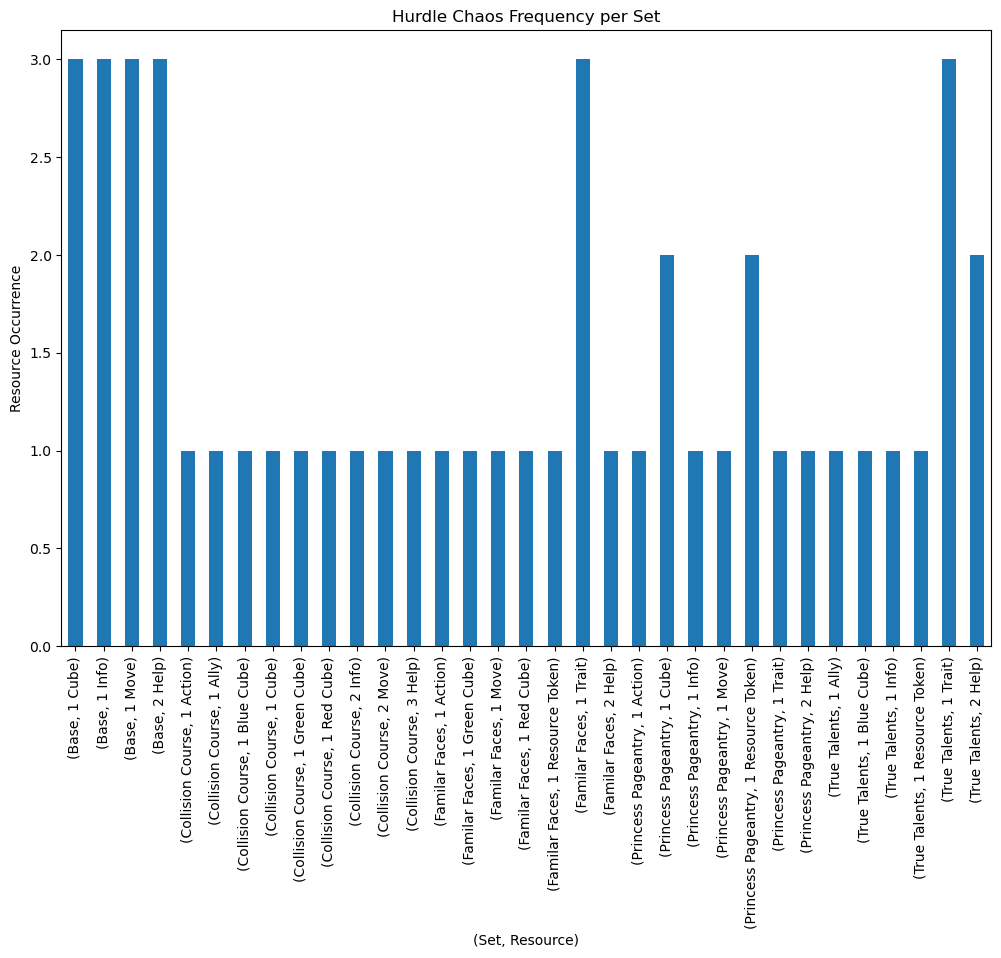

In [55]:
hurdles = pandas.read_csv('MLP/data/MLP Adventures Card Distribution - Hurdle.csv')
plotlib.figure()
chaos_counts = hurdles.groupby('Set')['Chaos'].value_counts().sort_index().plot(kind='bar',title='Hurdle Chaos Frequency per Set')
plotlib.ylabel('Resource Occurrence')
plotlib.xlabel('(Set, Resource)')
plotlib.show()

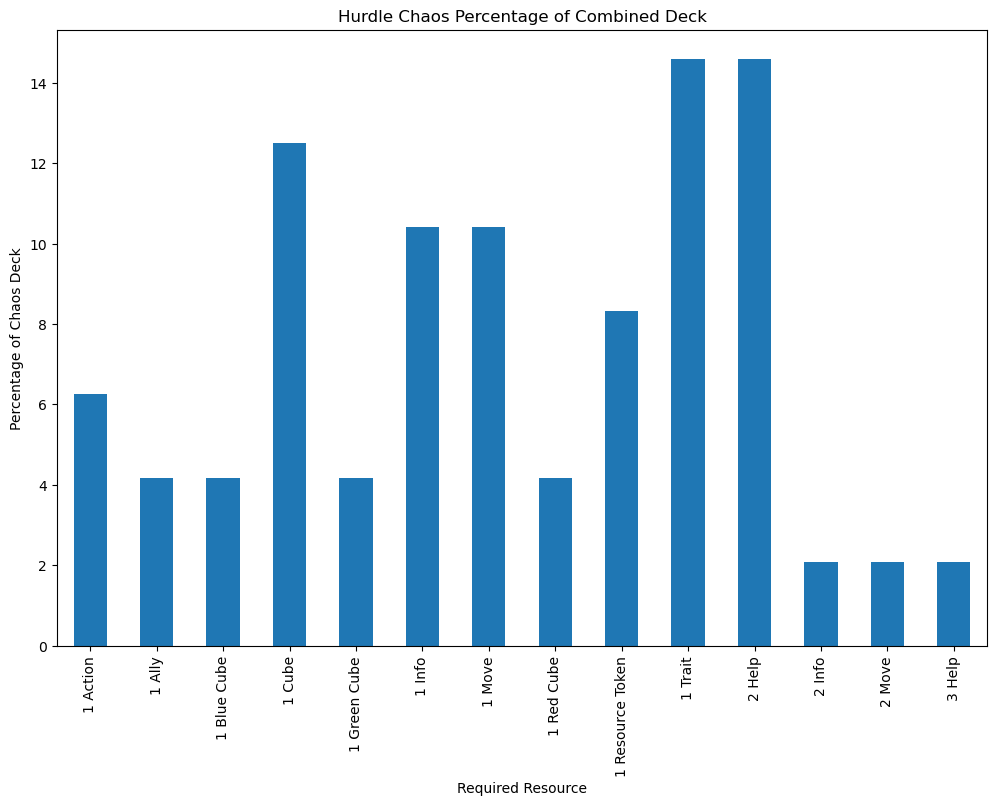

In [49]:
plotlib.figure()
(hurdles['Chaos'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar',title='Hurdle Chaos Percentage of Combined Deck')
plotlib.xlabel("Required Resource")
plotlib.ylabel("Percentage of Chaos Deck")
plotlib.show()

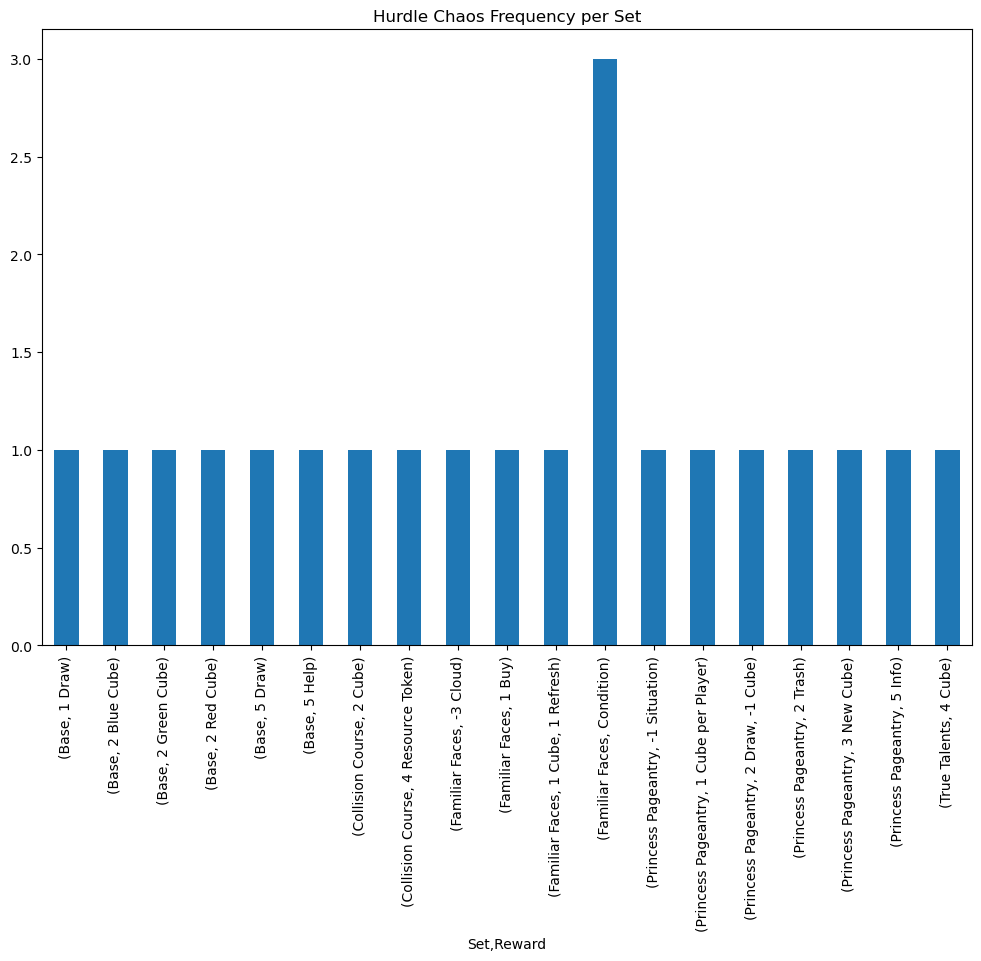

In [56]:
artifacts = pandas.read_csv('MLP/data/MLP Adventures Card Distribution - Artifact.csv')
plotlib.figure()
artifacts.groupby('Set')['Reward'].value_counts().sort_index().plot(kind='bar',title='Hurdle Chaos Frequency per Set')
plotlib.show()

[0 1 2 3 4 5 6 7 8 9]


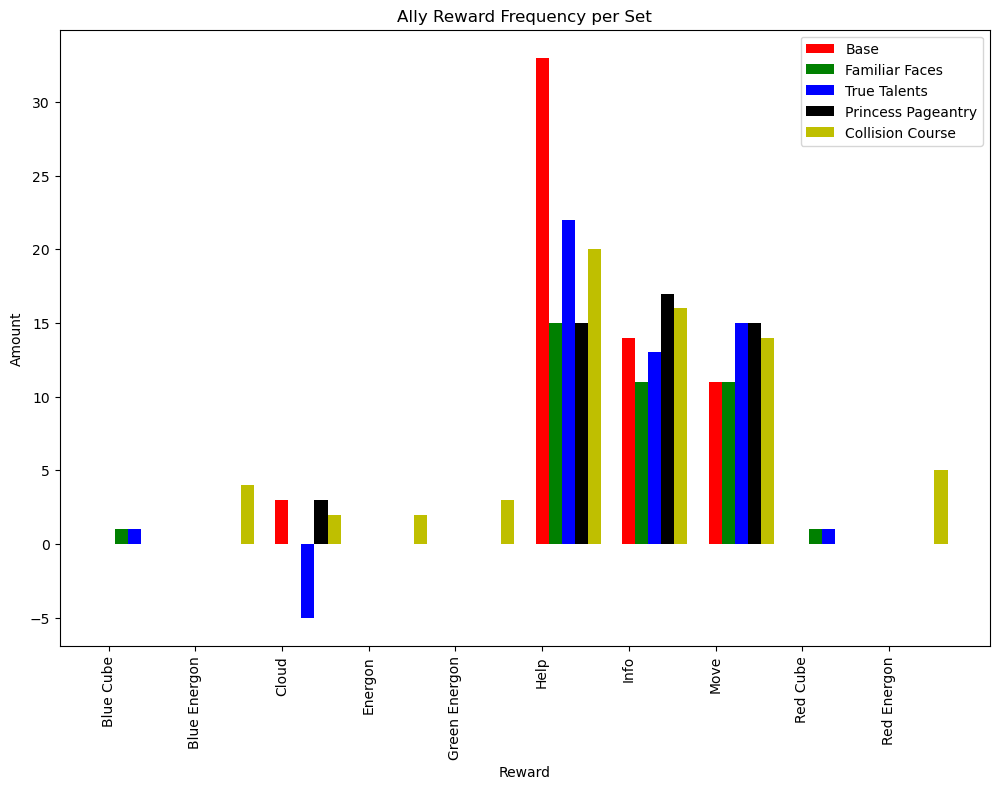

In [2]:
allies = pandas.read_csv('MLP/data/MLP Adventures Card Distribution - Ally.csv')
ally_sets = {}
for index,row in allies.iterrows():
    if not row['Set'] in ally_sets:
        ally_sets[row['Set']] = {}
    if pandas.isna(row['Reward']):
        continue
    amounts,kinds = parse_mlp(row['Reward'])
    for ii in range(0,len(amounts)):
        amount = amounts[ii]
        kind = kinds[ii]
        if not kind in ally_sets[row['Set']]:
            ally_sets[row['Set']][kind] = 0
        ally_sets[row['Set']][kind] += amount

def get_series(mlp_set,sets):
    keys = []
    values = []
    for k,v in sets[mlp_set].items():
        keys.append(k)
    keys.sort()
    for key in keys:
        values.append(sets[mlp_set][key])
    return keys,values
ally_names = allies['Set'].unique().tolist()
ally_rewards = []
ally_keys=[]
for ally_name in ally_names:
    keys,vals = get_series(ally_name, ally_sets)
    for k in keys:
        if not k in ally_keys:
            ally_keys.append(k)

ally_keys.sort()
for ally_name in ally_names:
    rewards = []
    for ally_key in ally_keys:
        if ally_key in ally_sets[ally_name]:
            rewards.append(ally_sets[ally_name][ally_key])
        else:
            rewards.append(0)
    ally_rewards.append(rewards)
plotlib.figure()
plotlib.title('Ally Reward Frequency per Set')
bar_width = .15
colors = ['r','g','b','k','y']
import numpy
ind = numpy.arange(len(ally_keys))
print(ind)
for ii in range(0,len(ally_names)):
    import pprint
    plotlib.bar(ind+bar_width*ii,ally_rewards[ii],label=ally_names[ii],color=colors[ii],width=bar_width)
plotlib.legend(loc='best')
plotlib.xlabel('Reward')
plotlib.ylabel('Amount')
plotlib.xticks(ind,ally_keys,rotation=90)
plotlib.show()

[0 1 2 3 4 5 6 7 8 9]


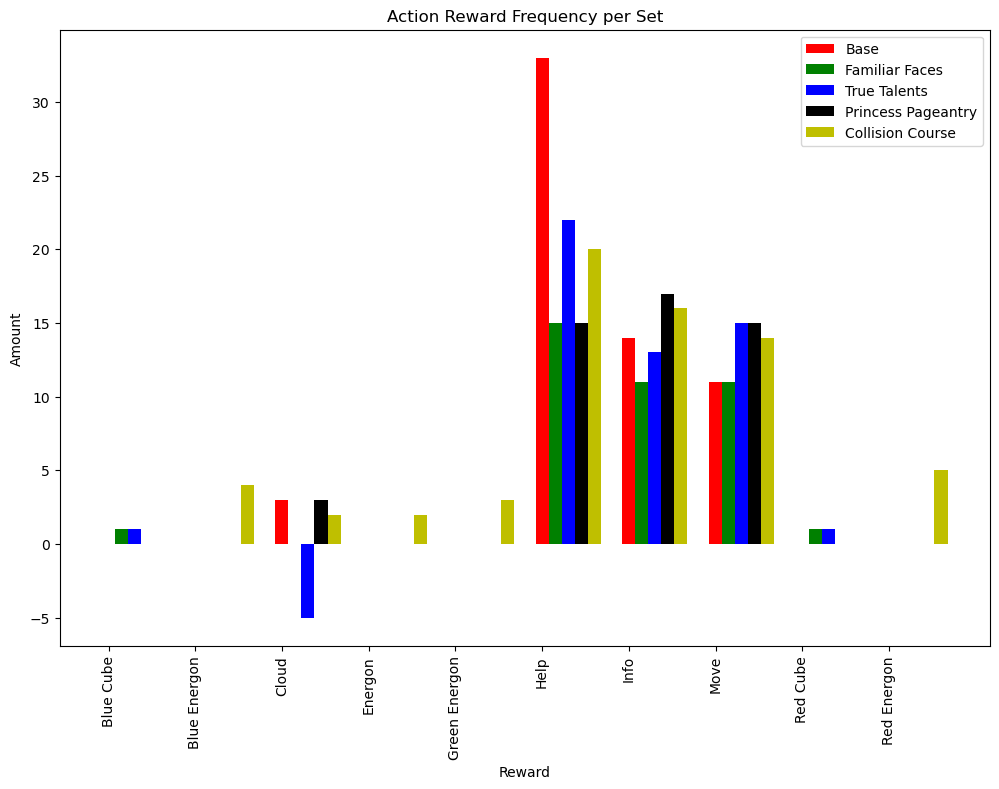

In [4]:
allies = pandas.read_csv('MLP/data/MLP Adventures Card Distribution - Ally.csv')
ally_sets = {}
for index,row in allies.iterrows():
    if not row['Set'] in ally_sets:
        ally_sets[row['Set']] = {}
    if pandas.isna(row['Reward']):
        continue
    amounts,kinds = parse_mlp(row['Reward'])
    for ii in range(0,len(amounts)):
        amount = amounts[ii]
        kind = kinds[ii]
        if not kind in ally_sets[row['Set']]:
            ally_sets[row['Set']][kind] = 0
        ally_sets[row['Set']][kind] += amount

def get_series(mlp_set,sets):
    keys = []
    values = []
    for k,v in sets[mlp_set].items():
        keys.append(k)
    keys.sort()
    for key in keys:
        values.append(sets[mlp_set][key])
    return keys,values
ally_names = allies['Set'].unique().tolist()
ally_rewards = []
ally_keys=[]
for ally_name in ally_names:
    keys,vals = get_series(ally_name, ally_sets)
    for k in keys:
        if not k in ally_keys:
            ally_keys.append(k)

ally_keys.sort()
for ally_name in ally_names:
    rewards = []
    for ally_key in ally_keys:
        if ally_key in ally_sets[ally_name]:
            rewards.append(ally_sets[ally_name][ally_key])
        else:
            rewards.append(0)
    ally_rewards.append(rewards)
plotlib.figure()
plotlib.title('Action Reward Frequency per Set')
bar_width = .15
colors = ['r','g','b','k','y']
import numpy
ind = numpy.arange(len(ally_keys))
print(ind)
for ii in range(0,len(ally_names)):
    import pprint
    plotlib.bar(ind+bar_width*ii,ally_rewards[ii],label=ally_names[ii],color=colors[ii],width=bar_width)
plotlib.legend(loc='best')
plotlib.xlabel('Reward')
plotlib.ylabel('Amount')
plotlib.xticks(ind,ally_keys,rotation=90)
plotlib.show()